In [20]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt

In [6]:
df=pd.read_csv('dataprocessed.csv')
print(df.shape)

(120915, 10)


In [7]:
df_countries=df[['country','price','points']]
grb_countries=df_countries.groupby('country')['price','points'].mean().reset_index()

/opt/conda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



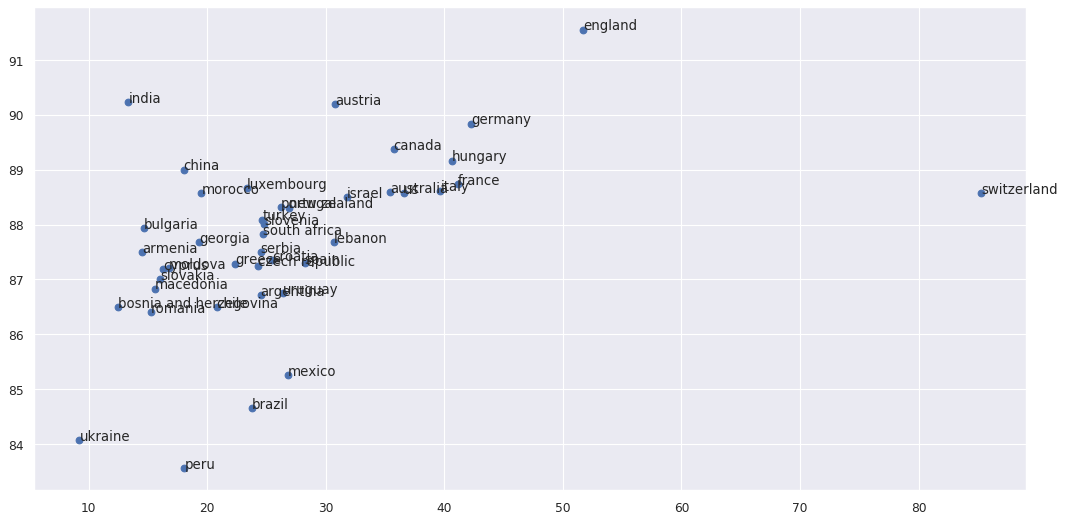

In [28]:
plt.figure(figsize=(16,8), dpi=80)
plt.scatter(grb_countries['price'], grb_countries['points'])

for i, txt in enumerate(grb_countries['country']):
    plt.annotate(txt, (grb_countries['price'][i], grb_countries['points'][i]))

In [49]:
grb_variety=df.groupby('variety')['country']

In [50]:
for name,group in grb_variety:
    print(name)
    print(group)

abouriou
42124         us
91364     france
120840    france
Name: country, dtype: object
agiorgitiko
2026      greece
4464      greece
4540      greece
8700      greece
9759      greece
           ...  
108231    greece
112726    greece
113228    greece
114264    greece
115779    greece
Name: country, Length: 63, dtype: object
aglianico
65        italy
727       italy
2410      italy
2547      italy
2806      italy
          ...  
119515    italy
119923    italy
120223    italy
120679    italy
120799    italy
Name: country, Length: 294, dtype: object
aidani
44022    greece
Name: country, dtype: object
airen
40852    spain
50291    spain
92917    spain
Name: country, dtype: object
albana
4148      italy
7790      italy
8118      italy
35469     italy
47019     italy
48007     italy
49097     italy
54080     italy
54829     italy
57862     italy
71279     italy
84432     italy
86229     italy
92345     italy
94700     italy
94722     italy
97776     italy
105271    italy
120154    italy


Name: country, dtype: object
garnacha-cariñena
102223    spain
Name: country, dtype: object
garnacha-monastrell
44210    spain
47379    spain
98386    spain
Name: country, dtype: object
garnacha-syrah
19784     spain
24159     spain
37503     spain
59864     spain
70765     spain
73131     spain
76647     spain
80687     spain
81756     spain
87410     spain
94356     spain
110820    spain
113358    spain
Name: country, dtype: object
garnacha-tempranillo
68073     spain
82205     spain
87848     spain
89725     spain
101139    spain
119292    spain
Name: country, dtype: object
gelber muskateller
1805      austria
2366      austria
4966      austria
5287      austria
9100      austria
11688     austria
21541     austria
27707     austria
34677     austria
35452     austria
43845     austria
49078     austria
55139     austria
55300     austria
63361     austria
77319     austria
86260     austria
86334     austria
95961     austria
113143    austria
117938    austria
Name: country, dtyp

Name: country, Length: 226, dtype: object
mourvèdre-syrah
8191            us
20864           us
84393    australia
Name: country, dtype: object
mtsvane
20402    georgia
82315    georgia
86084    georgia
Name: country, dtype: object
muscadel
80973    france
Name: country, dtype: object
muscadelle
320       australia
10640        france
14462     australia
36244     australia
42264        france
55236        france
67519     australia
101767    australia
109268       france
112978    australia
Name: country, dtype: object
muscadine
48979    us
81827    us
Name: country, dtype: object
muscat
319       australia
322       australia
2034             us
8491         france
9232         france
            ...    
115063       france
115069       france
117612       france
119414       france
119488       france
Name: country, Length: 126, dtype: object
muscat blanc
11157          us
12096          us
25694          us
35443          us
35908          us
39446          us
39801          us
540

Name: country, Length: 86, dtype: object
rosenmuskateller
24484    austria
Name: country, dtype: object
rosé
75        australia
311          france
312          france
394              us
462          france
            ...    
120663    argentina
120704       france
120716       france
120723           us
120729           us
Name: country, Length: 3261, dtype: object
roter traminer
45180     austria
56041     austria
102218    austria
Name: country, dtype: object
roter veltliner
7239      austria
9987      austria
11743     austria
15281     austria
26666     austria
110897    austria
114762    austria
117122    austria
Name: country, dtype: object
rotgipfler
3018      austria
4764      austria
18529     austria
27085     austria
36863     austria
41415     austria
43150     austria
48477     austria
55914     austria
62894     austria
67899     austria
76387     austria
76829     austria
79538     austria
87187     austria
88640     austria
90880     austria
101719    austria
112445

Name: country, dtype: object
trepat
9758     spain
18713    spain
32573    spain
38611    spain
45523    spain
51249    spain
74221    spain
81104    spain
83783    spain
94431    spain
Name: country, dtype: object
trincadeira
10254     portugal
10691     portugal
11526     portugal
14660     portugal
21961     portugal
24280     portugal
28580     portugal
30324     portugal
30354     portugal
31967     portugal
36675     portugal
44374     portugal
45314     portugal
69817     portugal
70432     portugal
71866     portugal
77551     portugal
77563     portugal
78440     portugal
87568     portugal
104873    portugal
117874    portugal
119549    portugal
120483    portugal
Name: country, dtype: object
trollinger
112014    germany
118613    germany
Name: country, dtype: object
trousseau
36528        france
55342        france
70856        france
74513     argentina
95827        france
116941       france
Name: country, dtype: object
trousseau gris
10390    us
27249    us
88770    us
Na

In [48]:
group

,title,variety,designation,country,province,description,price,winery,taster_name,points
47774,stobi 2014 žilavka (tikves),žilavka,tikves,macedonia,tikves,this macedonian wine made from 100% žilavka ha...,15.0,stobi,jeff jenssen,88


ModuleNotFoundError: No module named 'catboost'